In [25]:
import numpy as np
import pandas as pd
import imputation as imp
import forecasting as fc
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
import time
from codecarbon import EmissionsTracker

In [26]:
df = pd.read_csv("datasets/uci/uci_60min.csv")
df = df.select_dtypes(include="number")
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
1,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
3,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
4,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [27]:
imputation_methods = {
    "LOCF": imp.locf,
    "NOCB": imp.nocb,
    "Linear Interpolation": imp.linear_interpolation,
    "Linear Regression": imp.linear_regression,
    "LightGBM": imp.lightgbm,
}
target = "Global_active_power"

imputed = {}
performance = {}
df_masked, samples = imp.create_mcar_data(df, missing=0.2, seed=42)

for n, f in imputation_methods.items():
    tracker = EmissionsTracker(
        project_name=n,
        output_dir="performance",
        output_file="uci_codecarbon.csv",
    )
    # Start time and emission trackers
    tracker.start()
    start_time = time.time()

    df_imputed = f(df_masked.copy())

    # Stop trackers
    end_time = time.time()
    emissions = tracker.stop()

    # Store imputed data in dictionary
    imputed[n] = df_imputed

    # Get error metrics only for the masked values
    i = df.columns.get_loc(target)
    mask = samples[:, i]
    y_true = df.values[:, i][mask]
    y_pred = df_imputed.values[:, i][mask]

    valid = (~np.isnan(y_true)) & (~np.isnan(y_pred))
    y_true = y_true[valid]
    y_pred = y_pred[valid]

    # Compute error
    mae = mean_absolute_error(y_true, y_pred)
    nrmse = root_mean_squared_error(y_true, y_pred) / (np.max(y_true) - np.min(y_true))

    performance[n] = {
        "MAE": mae,
        "NRMSE": nrmse,
    }

[codecarbon WARNING @ 15:15:20] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 15:15:20] [setup] RAM Tracking...
[codecarbon INFO @ 15:15:20] [setup] CPU Tracking...
[codecarbon WARNING @ 15:15:21] We saw that you have a AMD Ryzen 5 7530U with Radeon Graphics but we don't know it. Please contact us.
[codecarbon WARNING @ 15:15:21] We will use the default power consumption of 4 W per thread for your 12 CPU, so 48W.
[codecarbon WARNING @ 15:15:21] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 15:15:21] CPU Model on constant consumption mode: AMD Ryzen 5 7530U with Radeon Graphics
[codecarbon WARNING @ 15:15:21] No CPU tracking mode found. Falling back on CPU load mode.
[codecarbon INFO @ 15:15:21] [setup] GPU Tracking...
[codecarbon INFO @ 15:15:21] No GPU found.
[codecarbon INFO @ 15:15

[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27291, number of used features: 6
[LightGBM] [Info] Start training from score 1.088350
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27310, number of used features: 6
[LightGBM] [Info] Start training from score 0.123707
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27304, number of used features: 6
[LightGBM] [Info] Start training from score 240.844237
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27360, number of used features: 6
[LightGBM] [Info] Start training from score 4.622085
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27344, number of used features: 6
[LightGBM] [Info] Start training from score 1.123250
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27446, numb

[codecarbon INFO @ 15:15:47] Energy consumed for RAM : 0.000003 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:15:47] Delta energy consumed for CPU with cpu_load : 0.000001 kWh, power : 4.800000000000001 W
[codecarbon INFO @ 15:15:47] Energy consumed for All CPU : 0.000001 kWh
[codecarbon INFO @ 15:15:47] 0.000004 kWh of electricity used since the beginning.


[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27671, number of used features: 6
[LightGBM] [Info] Start training from score 1.116707
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 27671, number of used features: 6
[LightGBM] [Info] Start training from score 1.118719
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27671, number of used features: 6
[LightGBM] [Info] Start training from score 1.117713
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27671, number of used features: 6
[LightGBM] [Info] Start training from score 1.109505
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27671, number of used features: 6
[LightGBM] [Info] Start training from score 1.111491


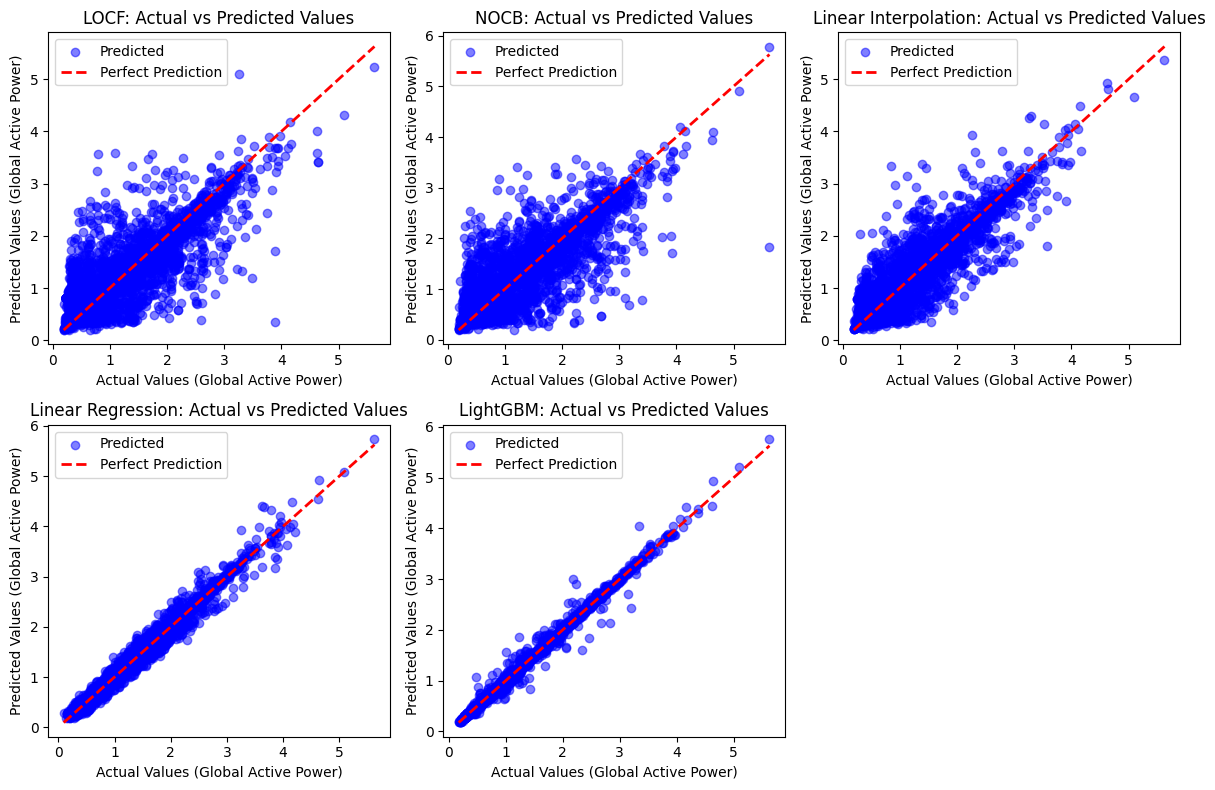

In [28]:
features = [
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3",
]
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()
forecasting = {}

for i, (name, df_imputed) in enumerate(imputed.items()):
    X = df_imputed[features]
    y = df_imputed[target]

    X_train, X_test, y_train, y_test = fc.split_data(X, y, train_size=0.8)

    model = LGBMRegressor(force_col_wise=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    axs[i].scatter(y_test, y_pred, alpha=0.5, label="Predicted", color="b")
    axs[i].plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        "r--",
        lw=2,
        label="Perfect Prediction",
    )
    axs[i].set_xlabel("Actual Values (Global Active Power)")
    axs[i].set_ylabel("Predicted Values (Global Active Power)")
    axs[i].set_title(f"{name}: Actual vs Predicted Values")
    axs[i].legend()


axs[-1].axis("off")

plt.tight_layout()
plt.savefig("performance/figures/uci/forecasting.png")
plt.show()

In [29]:
df_performance = pd.DataFrame.from_dict(performance, orient="index")
df_performance

,MAE,NRMSE
LOCF,0.492858,0.127751
NOCB,0.493836,0.127801
Linear Interpolation,0.368516,0.091767
Linear Regression,0.214824,0.059948
LightGBM,0.095130,0.041285


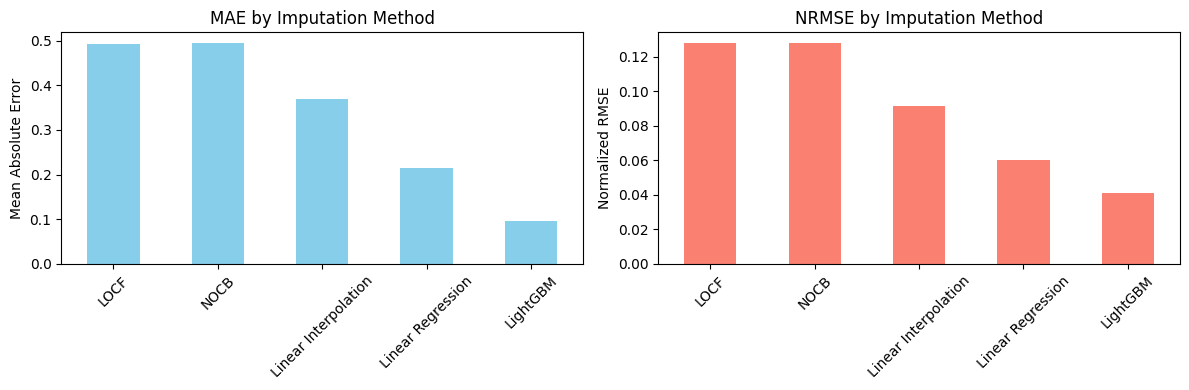

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

df_performance["MAE"].plot(kind="bar", ax=axs[0], color="skyblue")
axs[0].set_title("MAE by Imputation Method")
axs[0].set_ylabel("Mean Absolute Error")
axs[0].set_xticklabels(df_performance.index, rotation=45)

df_performance["NRMSE"].plot(kind="bar", ax=axs[1], color="salmon")
axs[1].set_title("NRMSE by Imputation Method")
axs[1].set_ylabel("Normalized RMSE")
axs[1].set_xticklabels(df_performance.index, rotation=45)

plt.tight_layout()
plt.savefig("performance/figures/uci/error.png")
plt.show()

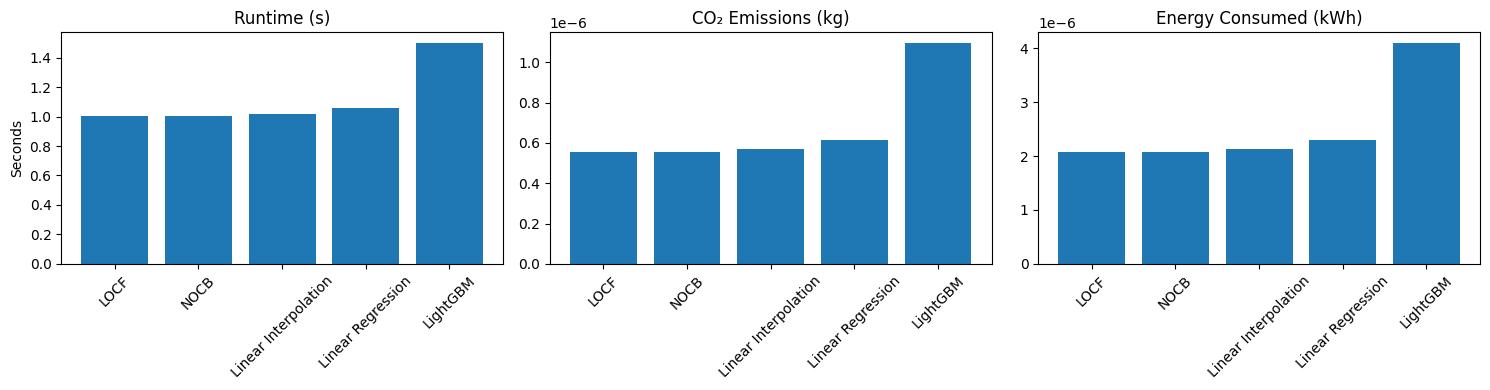

In [31]:
df_emission = pd.read_csv("performance/uci_codecarbon.csv")
df_emission_cleaned = df_emission[["project_name", "duration", "emissions", "energy_consumed"]]
df_emission_cleaned = df_emission_cleaned.set_index("project_name")

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].bar(df_emission_cleaned.index, df_emission_cleaned["duration"])
axs[0].set_title("Runtime (s)")
axs[0].set_ylabel("Seconds")
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(df_emission_cleaned.index, df_emission_cleaned["emissions"])
axs[1].set_title("CO₂ Emissions (kg)")
axs[1].tick_params(axis='x', rotation=45)

axs[2].bar(df_emission_cleaned.index, df_emission_cleaned["energy_consumed"])
axs[2].set_title("Energy Consumed (kWh)")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("performance/figures/uci/emissions.png")
plt.show()